# <span style="color:rgb(160,0,86)">Stichproben</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie wissen was eine **Zufallsstichprobe** ist und kennen ihre Bedeutung.
- Sie können einfache **binomial verteilte Modelle** berechnen und mit Daten vergleichen.
- Sie verstehen die Problematik der **Stichprobenverzerrung** und der **Auswahlverzerrung**.  
- Sie kennen den Unterschied zwischen der **Datenverteilung** der **Stichprobenverteilung**.  

***

### <span style="color:rgb(160,0,86)">Was ist eine Stichprobe?</span>

Bei einer statistischen Analyse möchte man Aussagen zu einer **Grundgesamtheit** oder **Population** von statistischen Einheiten machen, deren Merkmale einer bestimmten *theoretischen* Verteilung folgen. 
$$\begin{array}{c|cccc}
&\text{Merkmal A}&\text{Merkmal B}&\text{Merkmal C}&\cdots\\ \hline \text{Einheit 1}&a_1&b_1&c_1&\cdots\\
\text{Einheit 2}&a_2&b_2&c_2&\cdots\\
\text{Einheit 3}&a_3&b_3&c_3&\cdots\\
\text{Einheit 4}&a_4&b_4&c_4&\cdots\\
\text{Einheit 5}&a_5&b_5&c_5&\cdots\\
\vdots&\vdots&\vdots&\vdots&\end{array}$$
Hätten wir die Daten zu allen Einheiten, könnten wir die **relativen Häufigkeiten** der Werte zu jedem Merkmal bestimmen und eine Analyse machen. Diese Verteilung ist aber im Allgemeinen nicht bekannt. Alles was uns zur Verfügung steht, sind die Daten, die wir aus einer **Stichprobe** erhalten. 
$$\begin{array}{c|cccc}
&\text{Merkmal A}&\text{Merkmal B}&\text{Merkmal C}&\cdots\\ \hline \textcolor{lightgray}{\text{Einheit 1}}&\textcolor{lightgray}{a_1}&\textcolor{lightgray}{b_1}&\textcolor{lightgray}{c_1}&\textcolor{lightgray}{\cdots}\\
\text{Einheit 2}&a_2&b_2&c_2&\cdots\\
\textcolor{lightgray}{\text{Einheit 3}}&\textcolor{lightgray}{a_3}&\textcolor{lightgray}{b_3}&\textcolor{lightgray}{c_3}&\textcolor{lightgray}{\cdots}\\
\textcolor{lightgray}{\text{Einheit 4}}&\textcolor{lightgray}{a_4}&\textcolor{lightgray}{b_4}&\textcolor{lightgray}{c_4}&\textcolor{lightgray}{\cdots}\\
\text{Einheit 5}&a_5&b_5&c_5&\cdots\\
\vdots&\vdots&\vdots&\vdots&\end{array}$$

Wir kennen also die ***empirische* Verteilung** der Werte zu jedem Merkmal in der Stichprobe. Damit wir aus der Stichprobe etwas über die Gesamtheit sagen können, ist entscheident, mit welchen Verfahren wir so eine Stichprobe ziehen. 

<span style="color:rgb(160,0,86)">***Definition:***</span>
Eine **Stichprobe** ist eine Teilmenge von Daten aus einem grösseren Datensatz, der sogenannten **Grundgesamtheit**. Die Grundgesamtheit ist ein grosser, definierter, aber manchmal theoretischer oder imaginärer Datensatz.

<center>
<img src="Bilder/Grundgesamtheit-Stichprobe.png" width="55%" />
</center>

### <span style="color:rgb(160,0,86)">Können wir Grundgesamtheit modellieren?</span>

In speziellen Situationen, etwa wenn ***Daten aus einem physikalischen Prozess*** generiert werden, können wir mit **strengen Annahmen** und **theoretischen Überlegungen** die Verteilung der Grundgesamtheit beschreiben: 

Wenn zum Beispiel Daten mit einen binären Zufallsprozess, der $n$ mal unabhängig voneinander Werte wie *Kopf* oder *Zahl*, *klicken* oder *nicht klicken*, *Betrug* oder *kein Betrug* etc. erzeut, dann ist die Anzahl *Kopf*, *klicken* oder *Betrug* **binomial verteilt**. 

<span style="color:rgb(160,0,86)">***Merksatz:***</span> Wenn wir ein **theoretisches Modell für die Grundgesamtheit** haben, können wir **Erkenntnisse** gewinnen, indem wir unser **Wissen** über die Grundgesamtheit nutzen.

<span style="color:rgb(160,0,86)">***Beispiel:***</span> Werfen wir **10 mal eine gezinkte Münze**, bei der *Kopf* mit Wahrscheinlichkeit $65\%$ erscheint:

In [70]:
from scipy.stats import bernoulli

X = bernoulli(p=0.65)
experiment = X.rvs(size=10) 

print(experiment)

[1 0 1 0 0 1 1 1 0 0]


Nun zählen wir, **wie oft Kopf** vorkommt und wiederholen diesen Prozess 15 mal. Damit erzeugen wir eine Stichprobe mit 15 statistischen Einheiten zum Merkmal ***Anzahl Kopf***: 

In [71]:
stichprobe = [sum(X.rvs(size=10)) for _ in range(15)]
stichprobe

[np.int64(5),
 np.int64(10),
 np.int64(6),
 np.int64(4),
 np.int64(8),
 np.int64(8),
 np.int64(4),
 np.int64(8),
 np.int64(6),
 np.int64(6),
 np.int64(6),
 np.int64(4),
 np.int64(7),
 np.int64(7),
 np.int64(7)]

In einem Dichtediagramm können wir die **empirische Verteilung** der ***Anzahl Kopf*** darstellen: 

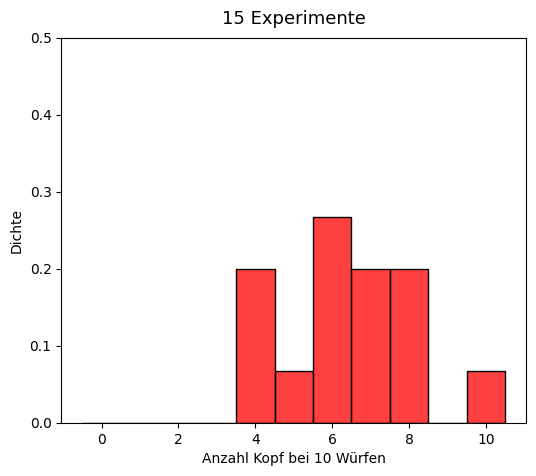

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(6,5))

axi = fig.add_subplot(1,1,1)
sns.histplot(stichprobe,
             bins=np.arange(-0.5,11.5),
             stat="density",
             color="red",
             ax = axi)
axi = plt.ylim(0,0.5)
axi = plt.title("15 Experimente", fontsize=13, pad=10)
axi = plt.xlabel("Anzahl Kopf bei 10 Würfen")
axi = plt.ylabel("Dichte")

plt.show()

Wenn wir eine Stichprobe mit 100000 Einheiten erzeugen, erkennen wir die **theoretische Verteilung der Grundgesamtheit**:

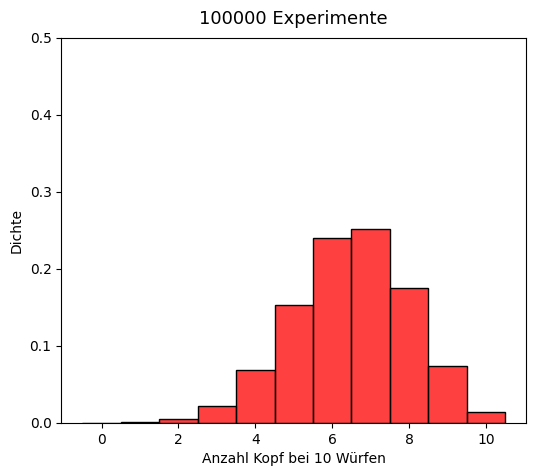

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

stichprobenUmfang = 100000
stichprobe = [sum(X.rvs(size=10)) for _ in range(stichprobenUmfang)]

fig = plt.figure(figsize=(6,5))

axi = fig.add_subplot(1,1,1)

sns.histplot(stichprobe,
             bins=np.arange(-0.5,11.5),
             stat="density",
             color="red",
             ax = axi)

axi = plt.ylim(0,0.5)
axi = plt.title("100000 Experimente", fontsize=13, pad=10)
axi = plt.xlabel("Anzahl Kopf bei 10 Würfen")
axi = plt.ylabel("Dichte")

plt.show()

Mathematisch können wir zeigen, dass die ***Anzahl Kopf in 10 Würfen*** einer **Binomial Verteilung** folgt. Für alle $\,\pmb{k\in\{0,1,2,\ldots,10\}}\,$ gilt:

$$\begin{align*}P(\texttt{k-mal Kopf bei 10 Würfen})\rule{0cm}{2cm} & \;\;=\;  
   \left\{\begin{array}{l} \texttt{Anzahl Möglichkeiten}\\
                           \texttt{bei genau k Positionen}\\ 
                           \texttt{Kopf zu haben} \end{array}\right\}
   \cdot 0.65^k \cdot 0.35^{10-k} \\
   \rule{0cm}{2cm}
   & \;\;=\; \binom{10}{k}\cdot 0.65^k \cdot 0.35^{10-k}\end{align*}$$


Die ***Anzahl Kopf in 10 Würfen*** ist also in der Tat $\,\pmb{\mathsf{Bin}(0.65,10)}\,\rule{0cm}{1.5cm}$**-Verteilt**. 

Aus dem Modul **scipy.stats** können wir eine Zufallsvariable $\,\pmb{X}\,$ mit dieser Binomialverteiliung laden:  

In [74]:
from scipy.stats import binom

X = binom(p=0.65,n=10)

Wir zeichnen nun diese **theoretische Verteilung der Grundgesamtheit** zusätzlich zu den **100000 Stichproben** oben: 

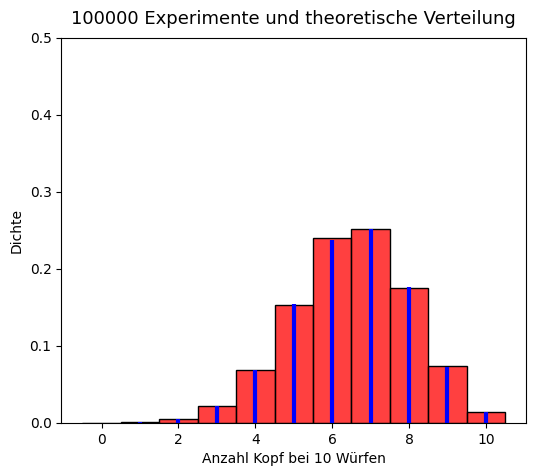

In [75]:
fig = plt.figure(figsize=(6,5))

axi = fig.add_subplot(1,1,1)

sns.histplot(stichprobe,
             bins=np.arange(-0.5,11.5),
             stat="density",
             color="red",
             ax = axi)
axi = plt.vlines(np.arange(0,11),
                 0, X.pmf(np.arange(0,11)),
                 lw=3,
                 color="blue")

axi = plt.ylim(0,0.5)
axi = plt.title("100000 Experimente und theoretische Verteilung", fontsize=13, pad=10)
axi = plt.xlabel("Anzahl Kopf bei 10 Würfen")
axi = plt.ylabel("Dichte")

plt.show()

Wenn uns zum Beispiel die ***mittlere Anzahl Kopf bei 10 Würfen*** interessiert, können wir nun diese Anzahl aus 
- der ***empirischen* Verteilung** der Stichprobe oder
- aus der ***theoretischen* Verteilung** der Grundgesamtheit

berechnen:

In [76]:
#aus der empirischen Verteilung:
mittelwert = sum(stichprobe)/stichprobenUmfang

#aus der theoretischen Verteilung:
erwartungswert = X.mean()

print("Arithmetisches Mittel der Stichprobe:",mittelwert)
print("Erwartungswert der theoretischen Verteilung:",erwartungswert)

Arithmetisches Mittel der Stichprobe: 6.50395
Erwartungswert der theoretischen Verteilung: 6.5


### <span style="color:rgb(160,0,86)">Aufgabe 1</span>
Auf einer Webseite gibt es 20 *Elemente mit Werbung* auf die User klicken können. Nehmen  wir an, dass ein User bei einem Besuch jedes Element mit einer Wahrscheinlichkeit von $p=0.33$ anklickt.
- Erzeugen Sie mit einer Bernoulli verteilten Zufallsvariablen eine Stichprobe für 200000 Besuche und stellen Sie die empirische Verteilung der **Anzahl Klicks pro Besuch** graphisch dar.
- Zeichnen Sie unter diesen Annahmen auch die theoretische Verteilung der Grundgesamtheit in die gleiche Figur.
- Vergleichen Sie die mittlere Anzahl Klicks pro Besuch in der Stichprobe mit dem Erwartungswert.

In [77]:
from scipy.stats import bernoulli

klick = bernoulli(p=0.33)

Wir erzeugen eine **Stichprobe von 200000 Besuchern**, die je auf die 20 Elemente klicken oder nicht und zählen die **Anzahl Klicks**:

In [78]:
anzahlBesuche = 200000

stichprobe = [sum(klick.rvs(size=20)) for _ in range(anzahlBesuche)]

Nun erstellen wir mit der Binomialverteilung das **Modell für die Anzahl Klicks**:

In [79]:
import numpy as np
from scipy.stats import binom

Klicks_modell = binom(p=0.33,n=20)

# Wahrscheinlichkeiten für k = 0, 1, 2, ..., 20
Klicks_modell_pmf = Klicks_modell.pmf(np.arange(0,21,1))

Wir berechnen die **Mittlere Lage der Anzahl Klicks** in der ***Stichprobe*** (arithmetisches Mittel) und im ***Modell*** (Erwartungswert):

In [80]:
mittelwert = sum(stichprobe)/anzahlBesuche

erwartungswert = Klicks_modell.mean()

Schlussendlich zeichnen wir 
- ein **Dichtediagramm** für die Daten der ***Stichprobe (rot)***
- die **Wahrscheinlichkeiten** als Striche für das ***Modell (blau)***

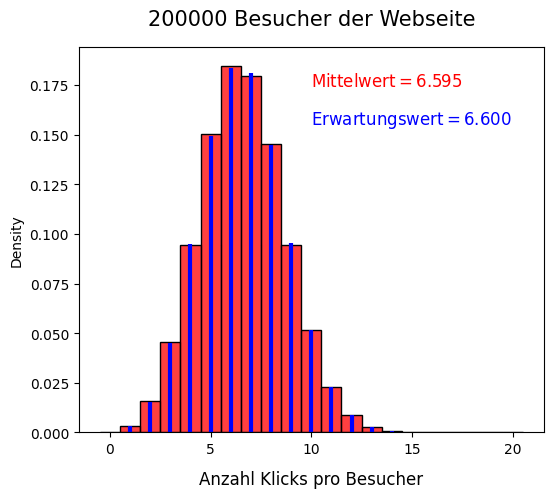

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,5))

axi = fig.add_subplot(1,1,1)

# Dichtediagramm
sns.histplot(stichprobe,
             bins=np.arange(-0.5,21.5),
             stat="density",
             color="red",
             ax = axi)

# Wahrscheinlichkeiten
axi.vlines(np.arange(0,21,1),      # x Koordinaten
           0, Klicks_modell_pmf,   # y Koordinaten von bis
           lw=3,color="blue")

axi.text(0.5,0.9,"Mittelwert"+r"$=$"+"{m:.3f}".format(m=mittelwert),
         fontsize=12,color="red",transform=plt.gca().transAxes)
axi.text(0.5,0.8,"Erwartungswert"+r"$=$"+"{e:.3f}".format(e=erwartungswert),
         fontsize=12,color="blue",transform=plt.gca().transAxes)

axi.set_title("200000 Besucher der Webseite",
              fontsize=15,pad=16)
axi.set_xlabel("Anzahl Klicks pro Besucher",
               fontsize=12,labelpad=10)

plt.show()

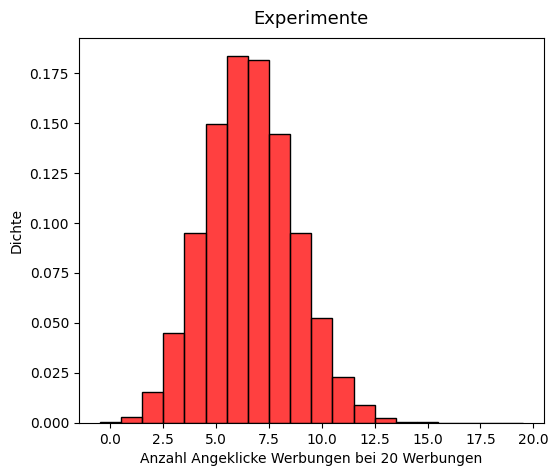

In [82]:
## Mein Lösungsvorschlag
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Zahlen generieren
from scipy.stats import binom

X = bernoulli(p=0.33)
stichprobenUmfang = 200000
stichprobe = [sum(X.rvs(size=20)) for _ in range(stichprobenUmfang)]
stichprobe

#Plot
fig = plt.figure(figsize=(6,5))

axi = fig.add_subplot(1,1,1)
sns.histplot(stichprobe,
            bins=np.arange(-0.5,20.5),
             stat="density",
             color="red",
             ax = axi)
axi = plt.title("Experimente", fontsize=13, pad=10)
axi = plt.xlabel("Anzahl Angeklicke Werbungen bei 20 Werbungen")
axi = plt.ylabel("Dichte")

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>
Ein grosses Rechenzentrum betreibt 50 Server. Die Wahrscheinlichkeit, dass ein Server an einem Tag ausfällt, beträgt $2\%$.
- Erzeugen Sie mit einer Bernoulli verteilten Zufallsvariablen eine Stichprobe von 5 Jahren und stellen Sie die empirische Verteilung der **Anzahl Ausfälle pro Tag** graphisch dar.
- Zeichnen Sie unter diesen Annahmen auch die theoretische Verteilung der Grundgesamtheit in die gleiche Figur.
- Vergleichen Sie die mittlere Anzahl Ausfälle pro Tag in der Stichprobe mit dem Erwartungswert.

***

### <span style="color:rgb(160,0,86)">Lösungsvorschlag</span>

Wir definieren eine **Zufallsvariable für den Ausfall eines Servers** mit $\,\pmb{p=0.02}\,$:

In [83]:
from scipy.stats import bernoulli

ausfall = bernoulli(p=0.02)

Wir erzeugen eine **Stichprobe** mit $\,\pmb{5\cdot365 = 1825}\,$ Tagen (5 Jahre) und zählen die **Anzahl Ausfälle pro Tag von 50 Servern**:

In [84]:
anzahlTage = 5 * 365

stichprobe = [sum(ausfall.rvs(size=50)) for _ in range(anzahlTage)]

Nun erstellen wir mit der Binomialverteilung das **Modell für die Anzahl Ausfälle**:

In [85]:
from scipy.stats import binom

Ausfälle_modell = binom(p=0.02,n=50)

# Wahrscheinlichkeiten für k = 0, 1, 2, ..., 50
Ausfälle_modell_pmf = Ausfälle_modell.pmf(np.arange(0,51,1))

Wir berechnen die **Mittlere Lage der Anzahl Ausfälle** in der ***Stichprobe*** (arithmetisches Mittel) und im ***Modell*** (Erwartungswert):

In [86]:
mittelwert = sum(stichprobe)/anzahlTage

erwartungswert = Ausfälle_modell.mean()

Schlussendlich zeichnen wir 
- ein **Dichtediagramm** für die Daten der ***Stichprobe (rot)***
- die **Wahrscheinlichkeiten** als Striche für das ***Modell (blau)***

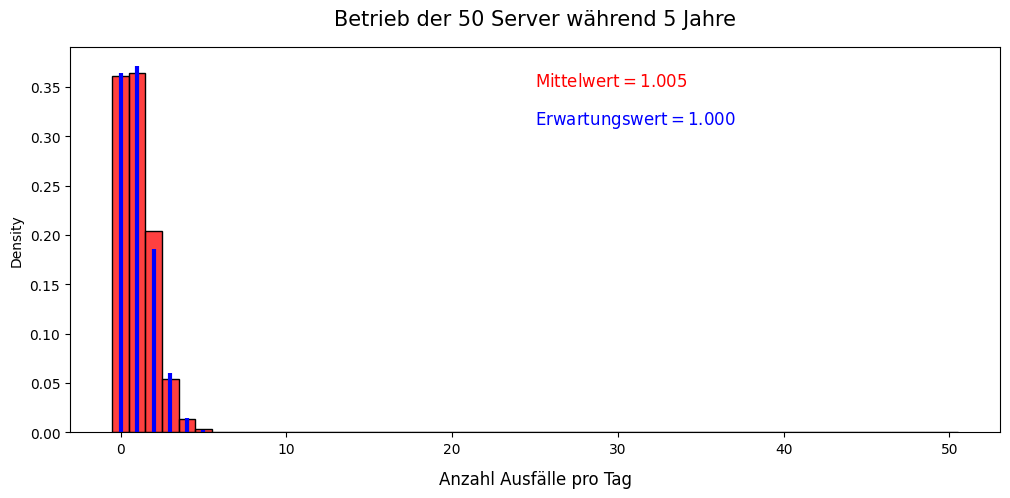

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,5))

axi = fig.add_subplot(1,1,1)

# Dichtediagramm
sns.histplot(stichprobe,
             bins=np.arange(-0.5,51.5),
             stat="density",
             color="red",
             ax = axi)

# Wahrscheinlichkeiten
axi.vlines(np.arange(0,51,1),       # x Koordinaten
           0, Ausfälle_modell_pmf,  # y Koordinaten von bis
           lw=3,color="blue")

axi.text(0.5,0.9,"Mittelwert"+r"$=$"+"{m:.3f}".format(m=mittelwert),
         fontsize=12,color="red",transform=plt.gca().transAxes)
axi.text(0.5,0.8,"Erwartungswert"+r"$=$"+"{e:.3f}".format(e=erwartungswert),
         fontsize=12,color="blue",transform=plt.gca().transAxes)

axi.set_title("Betrieb der 50 Server während 5 Jahre",
             fontsize=15,pad=16)
axi.set_xlabel("Anzahl Ausfälle pro Tag",
              fontsize=12,labelpad=10)

plt.show()

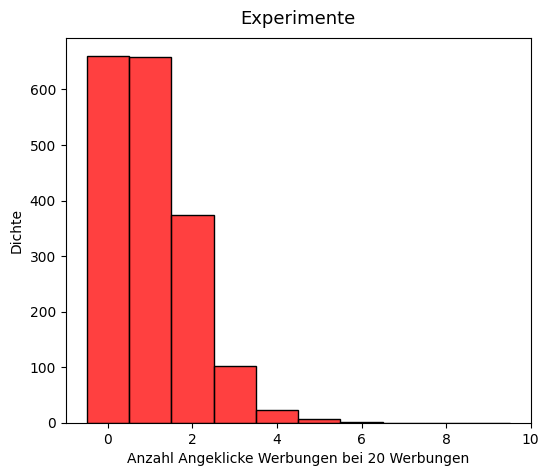

In [88]:
## Meine Lösung
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Zahlen generieren
from scipy.stats import binom

X = bernoulli(p=0.02)
stichprobenUmfang = 1825 #Tage
stichprobe = [sum(X.rvs(size=50)) for _ in range(stichprobenUmfang)]
stichprobe

#Plot
fig = plt.figure(figsize=(6,5))

axi = fig.add_subplot(1,1,1)
sns.histplot(stichprobe,
            bins=np.arange(-0.5,10.5),
             stat="count",
             color="red",
             ax = axi)
axi = plt.title("Experimente", fontsize=13, pad=10)
axi = plt.xlabel("Anzahl Angeklicke Werbungen bei 20 Werbungen")
axi = plt.ylabel("Dichte")

***

### <span style="color:rgb(160,0,86)">Was sind Zufallsstichproben?</span>

In den **Datenwissenschaften** machen wir uns selten Gedanken über solche theoretischen Eigenschaften der Verteilungen in der Grundgesamtheit.

Stattdessen fokusieren wir uns auf die **Stichprobenziehungsverfahren** und konzentrieren uns auf die **zur Verfügung stehenden Daten**. 

- Es wäre oft gar nicht möglich die theoretischen Verteilungen in der Grundgesamtheit zu berechnen.

Damit wir aus einer Stichprobe **verlässliche Schätzungen** zur Lage und Streuung der Daten in der Grundgesamtheit machen können, ist das **Stichprobenziehungsverfahren** von entscheidender Bedeutung.

<span style="color:rgb(160,0,86)">***Definition:***</span> 
Bei einem Zufallsstichprobenverfahren hat ***jede verfügbare Einheit*** der Grundgesamtheit bei jeder Ziehung ***die gleiche Chance***, in die Stichprobe aufgenommen zu werden. Die daraus resultierende Stichprobe wird als **einfache Zufallsstichprobe** bezeichnet. 

Die Stichprobenziehung kann
- **mit Zurücklegen** erfolgen, die Einheiten werden nach jeder Ziehung wieder in die Grundgesamtheit aufgenommen, damit sie in Zukunft erneut ausgewählt werden können.
- **ohne Zurücklegen** erfolgen, die Einheiten werden nach jeder Ziehung nicht wieder in die Grundgesamtheit aufgenommen, damit stehen die einmal ausgewählten Einheiten für künftige Ziehungen nicht mehr zur Verfügung.
<br>

Bei der Erstellung einer Schätzung auf der Grundlage einer Stichprobe ist die **Datenqualität** wichtig: 
- ***Vollständigkeit*** <br>
  Alle relevanten Werte müssen vorhanden sein – es dürfen keine wichtigen Daten fehlen. Wenn wir zum Beispiel das *durchschnittliche Einkommen* von Angestellten schätzen wollen, aber in der Stichprobe fehlen für 30% der Personen die Einkommenseinträge, dann ist die Schätzung möglicherweise verzerrt. Es könnte sein, dass gerade die Personen mit hohem Einkommen eher keine Angabe machen. <br>
  <span style="color:rgb(160,0,86)">***Merksatz:***</span> Fehlende Daten können zu falschen Schlüssen führen, selbst wenn die vorhandenen Daten korrekt sind.
- ***Konsistenz des Formats*** <br>
  Alle Daten sollten im gleichen Format oder Einheit vorliegen. Wenn wir zum Beispiel die durchschnittliche *Gesamtnote des Ausbildungsabschlusses* von Angestellen schätzen wollen, aber die Angaben aus unterschiedlichen Notenskalen gemacht werden (Bestnote 1 versus Bestnote 6), dann können wir keine durchschnittliche Note schätzen. <br>
  <span style="color:rgb(160,0,86)">***Merksatz:***</span> Formatfehler sind tückisch, weil sie nicht immer sofort auffallen, aber Schätzungen massiv verfälschen.
- ***Sauberkeit und Genauigkeit der einzelnen Datenpunkte*** <br>
  Einzelne Werte sollen plausibel und korrekt sein (keine Tippfehler, Ausreisser oder Messfehler). Wenn zum Beispiel beim Merkmal *Alter* ein Wert <tt>"250"</tt> statt <tt>"25"</tt>, verfälscht dieser einzelne Fehler bei kleinen Stichproben den Mittelwert deutlich.<br>
  <span style="color:rgb(160,0,86)">***Merksatz:***</span> Ein einzelner fehlerhafter Datenpunkt kann eine ganze Schätzung kippen.
  
In der Statistik sagen wir, dass eine Stichprobe **repräsentativ** sein muss.

<span style="color:rgb(160,0,86)">***Definition:***</span> 
Eine Stichprobe heisst ***repräsentativ***, wenn ihre statistischen Merkmale (Lage, Streuung, Häufigkeiten) die entsprechenden Merkmale der Grundgesamtheit möglichst gut widerspiegeln.

<span style="color:rgb(160,0,86)">***Merksatz:***</span> Eine Stichprobe ist repräsentativ, wenn sie die Grundgesamtheit **unverzerrt** abbildet und keine **systematische Über**- oder **Unterrepräsentation** bestimmter Teilgruppen enthält.

#### <span style="color:rgb(160,0,86)">Beispiele: Das "Literary Digest Disaster" von 1936</span>

Der demokratische Amtsinhaber ***Franklin D. Roosevelt*** steht kurz vor dem Ende seiner ersten Amtszeit und muss sein Mandat gegen den republikanischen Herausforderer ***Alfred M. Landon***, den Gouverneur von Kansas, verteidigen. 

<center>
<img src="Bilder/Kandidaten.png" width="45%" />
</center>

Zu dieser Zeit erfreut sich das wöchentlich erscheinende Magazin ***Literary Digest*** einer grossen Popularität. Die Herausgeber des Digest können angesichts der Wahl auf eine erstaunliche Erfolgsserie zurückblicken: Mit Hilfe von ***Meinungsumfragen*** war es nämlich gelungen, die Sieger der Präsidentschaftswahlen von 1916, 1920, 1924, 1928 und 1932 korrekt vorherzusagen. 

<center>
<img src="Bilder/LD.png" width="55%" />
</center>

Auch für 1936 plante das Magazin wieder eine grossangelegte Wahlbefragung – und dieses Jahr wollte man alles bisher dagewesene übertreffen und den Wahlausgang mit der **grössten Wählerbefragung aller Zeiten** noch genauer vorhersagen.

Die bisherigen Digest-Wahlumfragen basierten auf Quasi-Vollerhebungen unter der Leserschaft des Magazins. Als Publikation, die keinem politischen Lager zugeordnet werden konnte, besass der Digest Leser sowohl unter den Anhängern der Republikaner wie auch der Demokraten – und natürlich der unpolitischen Mehrheit. Einige Monate vor der Wahl lagen einer bestimmten Ausgabe des Digest ***Stimmzettel*** im Postkartenformat bei, auf denen ein Kandidat angekreuzt werden konnte und die anschliessend zum Verlag zurückgeschickt wurden. Auf diese Weise führte das Magazin quasi eine Vollerhebung unter der eigenen Leserschaft durch, wobei natürlich längst nicht jeder teilnahm.

**Die grösste Stichprobe der US-Wahlforschung**

Für 1936 hatte man sich vorgenommen, die Genauigkeit der bisherigen Befragungen dadurch zu übertreffen, dass man eine deutlich vergrösserte Stichprobe zog. Das bisherige Verfahren mit den beiliegenden Stimmzetteln wurde durch eine der ***ersten Telefonbefragungen*** überhaupt ergänzt, basierend auf einer **Zufallsauswahl anhand des Telefonregisters** sowie des KfZ-Registers. Postalische und telefonische Befragung erreichten insgesamt **mehr als 10 Millionen** wahlberechtigte Amerikaner, von denen sich etwa 2.3 Millionen an der Stimmabgabe beteiligten – eine Stichprobe bisher unerreichten Umfangs (immerhin ein knappes Viertel der 45.6 Millionen späteren Wähler), von der man annahm, dass sie zu einer hochpäzisen Prognose des Wahlausgangs führen würde.

<center>
<img src="Bilder/LDOktober1936.png" width="65%" />
</center>

Auf der Basis dieser Ergebnisse prognostizierte der Literary Digest einen Erdrutschsieg für den Republikaner Landon und titelte: <tt>"Landon in a Landslide!"</tt>.

Tatsächlich erhielt jedoch bekanntlich Roosevelt das Mandat für eine zweite Amtszeit. Und das mit einem enormen Vorsprung: Lediglich in zwei Bundesstaaten – Vermont und Massachusetts – konnte Landon die Wahl für sich entscheiden – einer der deutlichsten Wahlsiege der US-Geschichte. Insgesamt konnte Roosevelt 61% der Wählerstimmen und ganze 98% der „Wahlmänner” auf sich vereinen.

<center>
<img src="Bilder/PrognoseLD.png" width="90%" />
</center>

Die Blamage für das Magazin und der Riss in der eigenen Glaubwürdigkeit waren so gewaltig, dass die Leserschaft in den Folgejahren rapide abnahm und der Literary Digest schliesslich eingestellt werden musste. 

**Übrigens:** 1936 gelangte auch ein späterer Pionier der Markt- und Meinungsforschung zu erstem Ruhm. Der junge George Gallup (Begründer der *Gallup-Umfrage*) konnte ***anhand einer wesentlich kleineren Sichprobe*** - er führte alle zwei Wochen Umfragen unter nur 2000 Personen durch -  einen Sieg Roosevelts korrekt voraussagen, ganz im Gegensatz zu den Statistikern des Digest. 

<center>
<img src="Bilder/Gallup.png" width="40%" />
</center>

Doch wie konnte es zu dieser geradezu unfassbar schlechten Wahlprognose, dieser bis dato **grössten Blamage der Wahlforschung** kommen?

Im wesentlichen sind zwei Verzerrungseffekte für die enorme Abweichung des vorhergesagten vom tatsächlichen Wahlergebnis verantwortlich. 
1. Bei der Planung der Telefonbefragung wurde tatsächlich ausser Acht gelassen, dass ***Telefone*** 1936 noch längst ***nicht flächendeckend verfügbar*** waren und sich ***das Merkmal Telefoninhaber*** keineswegs zufällig in der Gesamtbevölkerung verteilte. Der Grossteil aller Anschlüsse befand sich in einkommensstarken Haushalten, die traditionell dem konservativ-republikanischen Lager zuneigen. <br> Ähnliches gilt für das ***KfZ-Register***, denn auch die Mehrheit der Automobilinhaber stammte 1936 noch aus einkommensstarken Schichten. Trotzdem fand **keine Gewichtung der Ergebnisse** statt, um den überproportionalen Anteil republikanischer Wähler auszugleichen, so dass sich die Verzerrung (Bias) im Auswahlverfahren auf das Endergebnis auswirken konnte. <br>
Als Erkenntnis aus diesem, ersten Fehler ist demnach festzuhalten, dass <span style="color:rgb(160,0,86)">**auch eine korrekt durchgeführte Zufallsauswahl nicht zu einer brauchbaren Stichprobe führt, wenn sie aus einer Teilmenge der Grundgesamtheit entnommen wird, in der hinsichtlich der untersuchten Merkmale keine Strukturäquivalenz zur Grundgesamtheit besteht**</span> – wie eben bei den Telefonverwendern und den Wahlberechtigten. <br> **Dieses Problem ist dank der Online-Marktforschung heute wieder hochaktuell** (Panelrekrutierung).

2. Die zweite Verzerrung trat im Bereich der schriftlichen Befragung auf. Der überwiegende Anteil der 10 Millionen angesprochenen Wahlberechtigten wurde über die Stimmzettel erreicht, doch ***nur etwas mehr als 20% der Angesprochenen beteiligten sich auch an der Stimmabgabe***. Da das **Merkmal Motivation zur Teilnahme** in der Regel nicht zufällig in einer beliebigen Gruppe von angesprochenen Personen verteilt ist, sondern mit anderen Merkmalen zusammenhängt, ist dadurch, dass die **Probanden selbst entscheiden, ob sie zur Stichprobe gehören**, eine Verzerrung zu erwarten. <span style="color:rgb(160,0,86)">**Die Stichprobe bildet sich in solchen Fällen gewissermassen selbst, ein Vorgang, der als Selbstselektion bezeichnet wird und der in der Regel zu starken Verzerrungen führt**</span>.

***

### <span style="color:rgb(160,0,86)">Was ist eine Stichprobenverzerrung?</span>

<span style="color:rgb(160,0,86)">***Merksatz:***</span> Eine ***Verzerrung der Stichprobe*** liegt vor, wenn der Unterschied 
-  bedeutsam ist und
-  davon ausgegangen werden kann, dass er ***auch bei anderen Stichproben bestehen bleibt***, die auf gleiche Weise erhoben werden.

Die Bewertungen von Restaurants, Hotels, Cafés usw., die sie auf Social-Media-Websites lesen, sind zum Beispiel anfällig für Verzerrungen, da die Personen, die sie abgeben, nicht zufällig ausgewählt werden, sondern selbst die Initiative zum Schreiben ergriffen haben. 

- Dies führt zu einer **Verzerrung durch Selbstselektion**.

Die Personen, die motiviert sind, Bewertungen zu schreiben, sind möglicherweise diejenigen, die schlechte Erfahrungen gemacht haben, die mit der Einrichtung in Verbindung stehen oder die einfach eine andere Art von Person sind als diejenigen, die keine Bewertungen schreiben. 

<span style="color:rgb(160,0,86)">***Bemerkung:***</span> Beachten sie, dass Stichproben mit Selbstselektion zwar unzuverlässige Indikatoren für die tatsächliche Situation sein können, dass sie aber zuverlässig sein können, wenn man einfach einen Betrieb **mit einem ähnlichen vergleicht**, weil allenfalls derselbe Selbstselektionsbias für beide gelten.

<span style="color:rgb(160,0,86)">***Definition:***</span> 
Eine **statistische Verzerrung (Bias)**  bezieht sich auf ***systematische Mess- oder Stichprobenfehler***, die durch das Mess- oder Stichprobenverfahren verursacht werden. 

Eine wichtige Unterscheidung sollte zwischen ***Fehlern aufgrund*** 
- **des Zufalls** und
- **von Verzerrungen**
getroffen werden.

Betrachten wir den physikalischen Prozess eines Gewehrs, das auf ein Ziel schiesst. Es wird nicht jedes Mal der Mittelpunkt des Ziels getroffen. 

- Auch bei einem ***unverzerrten Prozess*** gibt es Fehler, aber diese sind zufällig und tendieren nicht stark in eine Richtung.
- Ergebnisse zeigen eine ***Verzerrung***, wenn es immer noch zufällige Fehler gibt, aber die Schüsse zum Beispiel dazu neigen, in einen anderen Quadranten zu fallen.

<center>
<img src="Bilder/Bias.png" width="55%" />
</center>

Verzerrungen treten in verschiedenen Formen auf und können **beobachtbar** oder **unsichtbar** sein. 

Wenn ein Ergebnis auf eine Verzerrung hindeutet (etwa bezüglich eines Referenzwertes oder tatsächliche Werte), ist dies häufig ein Indikator dafür, dass ein statistisches oder maschinelles Lernmodell ***falsch spezifiziert*** wurde oder ***ein wichtiges Merkmal nicht berücksichtigt wurde***.

***

### <span style="color:rgb(160,0,86)">Was ist eine Auswahlverzerrung?</span>

<span style="color:rgb(160,0,86)">***Merksatz:***</span>  Wenn man eine ***Behauptung*** aufstellt und dann ein ***gut konzipiertes Experiment*** durchführt, um sie zu testen, kann man sich auf die Schlussfolgerung verlassen. 

**Das ist jedoch oft nicht der Fall!** 

<span style="color:rgb(160,0,86)">***Definition:***</span> 
Unter **Auswahlverzerrung** versteht man die ***bewusste oder unbewusste Auswahl von Daten*** in einer Weise, die zu einer irreführenden oder flüchtigen Schlussfolgerung führt.

- Häufig betrachtet man die verfügbaren Daten und versucht, Muster zu erkennen. Aber ist das Muster echt oder nur das Produkt von **Datenschnüffelei**?
- Wenn Daten ausgiebig durchforstet werden, bis etwas Interessantes zum Vorschein kommt, besteht die Gefahr einer Auswahlverzerrung. 

Es gibt ein Sprichwort unter Statistikern: <span style="color:rgb(160,0,86)">***Wenn man die Daten lange genug quält, werden sie früher oder später gestehen.***</span>

Anhand des **folgenden Beispiels** lässt der ***Unterschied zwischen einem Phänomen*** verdeutlichen, das man 
1. <span style="color:rgb(160,0,86)">***nachweisen kann***</span>, wenn man eine Behauptung **mit Hilfe eines Experiments** testet. 
2. <span style="color:rgb(160,0,86)">***entdeckt***</span>, wenn man die **verfügbaren Daten durchsichtet**. 

#### <span style="color:rgb(160,0,86)">Beispiel: Ein Gedankenexperiment zu besonderer Begabung</span>
1. Stellen wir uns vor, jemand erzählt uns, dass sie eine Münze werfen kann, so dass sie bei den nächsten 10 Würfen Kopf zeigt. Wir fordern sie heraus! Das enspricht einem statistischen Versuch. Sie wirft die Münze 10 Mal und alle Würfe landen auf Kopf. Offensichtlich schreiben wir ihr eine besondere Begabung zu - die Wahrscheinlichkeit, dass 10 Münzwürfe zufällig Kopf ergeben, liegt bei 1 zu 1000. 
2. Stellen wir uns nun vor, dass ein Stadionsprecher die 20000 Zuschauer auffordert, zehnmal eine Münze zu werfen und sich bei einem Platzanweiser zu melden, wenn sie zehnmal hintereinander Kopf bekommen. Die Wahrscheinlichkeit, dass jemand im Stadion 10 Mal Kopf erhält, ist extrem hoch - mehr als 99%! (es ist 1 minus der Wahrscheinlichkeit, dass niemand 10 Mal Kopf erhält). Die nachträgliche Auswahl einer Person im Stadion, die 10 Köpfe erhalten hat, deutet also nicht auf ein besonderes Talent hin - es ist höchstwahrscheinlich Glück. 

Da die ***wiederholte Überprüfung grosser Datensätze*** ein zentraler Bestandteil in der Datenwissenschaft ist, muss man sich über Auswahlverzerrungen Gedanken machen. 

Eine für Datenwissenschaftler besonders besorgniserregende Form der Verzerrung ist das, was John Elder (Gründer von Elder Research, einem angesehenen Data-Mining-Beratungsunternehmen) den ***vast search effect*** nennt.
- Wenn man wiederholt verschiedene Fragen an einen grossen Datensatz stellt, ***wird man zwangsläufig etwas Interessantes finden***. 

<span style="color:rgb(160,0,86)">***Wichtige Frage:***</span> Ist das Ergebnis, das wir gefunden haben, ***wirklich interessant***, oder handelt es sich um einen ***zufälligen Ausreisser***?

Zu den **typischen Formen von Auswahlverzerrungen** in der Statistik gehören neben dem ***vast search effect*** auch ***nicht zufällige Stichproben***: 
- das ***Herausgreifen von Daten*** oder die Auswahl von Zeitintervallen,
die einen bestimmten statistischen Effekt verstärken,
- das ***Abbrechen eines Experiments***, wenn die Ergebnisse *interessant* aussehen.

***

### <span style="color:rgb(160,0,86)">Wie erreichen wir repräsentative Stichproben?</span>

Um das Problem der Stichprobenverzerrung zu vermeiden, das den *Literary-Digest* dazu veranlasste, Landon gegenüber Roosevelt zu bevorzugen, entschied sich George Gallup für wissenschaftlichere Methoden, um eine für die amerikanische Wählerschaft repräsentative Stichprobe zu erhalten. 

Heute gibt es eine Vielzahl von Methoden, um **Repräsentativität** zu erreichen, aber das Herzstück all dieser Methoden ist die Zufallsstichprobe.

Zufallsstichproben zu erhalten ist nicht immer einfach. Die ***richtige Definition einer zugänglichen Population*** ist entscheidend. 

#### <span style="color:rgb(160,0,86)">Beispiele:</span>
Nehmen wir an, wir wollen ein repräsentatives Profil von Kunden erstellen und müssen eine Pilotkundenbefragung durchführen. Die Umfrage muss repräsentativ sein, ist aber arbeitsintensiv. Zunächst müssen wir definieren, **wer ein Kunde ist**. Wir könnten etwa alle Kundendatensätze auswählen, bei denen der Kaufbetrag grösser Null ist. Es stellen sich weitere Fragen:
- Schliessen wir alle früheren Kunden ein?
- Schliessen wir Rückerstattungen ein?
- Interne Testkäufe?
- Sowohl Rechnungssteller als auch Kunde?

Als nächstes müssen wir ein **Stichprobenverfahren** festlegen. Es könnte lauten: 
- *Wir Wählen 100 Kunden nach dem Zufallsprinzip aus*.

Wenn es sich um eine **Stichprobe aus einem Datenstrom** handelt, etwa Kundentransaktionen in Echtzeit oder Web-Besucher, können **zeitliche Erwägungen** wichtig sein: 
- unterscheidet sich ein Web-Besucher um 10 Uhr morgens an einem Wochentag von einem Web-Besucher um 22 Uhr an einem Wochenende?


Oft wird eine **geschichtete Stichprobe** verwendet, um sicherzustellen, dass alle wichtigen Teilgruppen der Grundgesamtheit angemessen vertreten sind.

<span style="color:rgb(160,0,86)">***Definition:***</span>
Bei geschichteten Stichproben wird die Grundgesamtheit in Schichten eingeteilt, und ***aus jeder Schicht werden Zufallsstichproben gezogen***. 

#### <span style="color:rgb(160,0,86)">Beispiele:</span>
Wenn Meinungsforscher die Wahlvorlieben von ***Weissen***, ***Schwarzen*** und ***Hispanics*** untersuchen wollen, reicht eine einfache Zufallsstichprobe oft nicht aus. 
- In einer solchen Stichprobe wären zu wenige Schwarze und Hispanics vertreten.
- Deshalb muss man bei einer geschichteten Stichprobe diese Gruppen gezielt stärker berücksichtigen, damit jede Gruppe gross genug in der Stichprobe vertreten ist.

***

### <span style="color:rgb(160,0,86)">Was ist der Unterschied zwischen Grösse und Qualität?</span>

Wann kommt es auf die Grösse an? In der Ära der grossen Datenmengen ist es manchmal überraschend, ***dass kleiner besser ist***. 

Die **Zeit** und der **Aufwand**, die für die Stichprobenziehung aufgewendet werden, verringern nicht nur Verzerrungen, sondern ermöglichen auch eine grössere Aufmerksamkeit für die  **Datenqualität**. 
- So können beispielsweise ***fehlende Daten*** und ***Ausreisser*** nützliche Informationen enthalten.
- Das Aufspüren von fehlenden Werten oder die Auswertung von Ausreissern in Millionen von Datensätzen kann ***unerschwinglich teuer*** sein, aber bei einer Stichprobe von mehreren tausend Datensätzen ist dies ***durchaus machbar***.
- ***Datenvisualisierung*** und ***manuelle Inspektion*** sind bei einer zu grossen Datenmenge nicht mehr möglich.

<span style="color:rgb(160,0,86)">**Wann werden also grosse Datenmengen benötigt?**</span>

Das klassische Szenario für den Wert von Big Data ist, wenn die Daten **nicht nur massenhaft** vorliegen, sondern **auch dünn besetzt** sind. 

Nehmen wir die von Google empfangenen ***Suchanfragen***, bei denen die Spalten **Begriffe** sind, die Zeilen **einzelne Suchanfragen** und die Zellenwerte entweder **0 oder 1** sind, je nachdem, ob eine Anfrage einen Begriff enthält. Ziel ist es, das beste vorausgesagte Suchziel für eine bestimmte Anfrage zu ermitteln. 

Es gibt mehr als ***150000 Wörter*** in der englischen Sprache, und Google verarbeitet über ***1 Billion Suchanfragen pro Jahr***. Daraus ergibt sich eine riesige Matrix, bei der die **überwiegende Mehrheit der Einträge 0** ist.

$$\begin{array}{c|ccccc}
&\cdots&\text{Ricky}&\cdots&\text{Rotkäppchen}&\cdots\\ \hline 
\text{Suche 1}&\cdots&0&\cdots&1&\cdots\\
\text{Suche 2}&0&1&0&1&0\\
\text{Suche 3}&\cdots&0&\cdots&0&\cdots\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\end{array}$$

<span style="color:rgb(160,0,86)">**Dies ist ein echtes Big-Data-Problem!**</span> 

Nur wenn enorme Datenmengen angehäuft werden, können für die meisten Abfragen effektive Suchergebnisse geliefert werden. Und ***je mehr Daten sich ansammeln, desto besser sind die Ergebnisse***. 

Bei ***populären Suchbegriffen*** ist dies kein Problem. Für die Handvoll extrem populärer Themen, die zu einem bestimmten Zeitpunkt im Trend liegen, lassen sich recht schnell effektive Daten finden. 

Der eigentliche Wert der modernen Suchtechnologie liegt in der Fähigkeit, detaillierte und nützliche Ergebnisse ***für eine Vielzahl von Suchanfragen*** zu liefern, auch für solche, die nur mit einer Häufigkeit von, sagen wir, eins zu einer Million auftreten.

Nehmen wir die Suchanfrage ***Ricky Ricardo*** *und* ***Rotkäppchen***. 
- In den Anfängen des Internets hätte diese Suchanfrage wahrscheinlich Ergebnisse zu *Ricky Ricardo*, dem Bandleader der ***Fernsehsendung I Love Lucy***, in der er die Hauptrolle spielte, <span style="color:rgb(160,0,86)">***und***</span> dem ***Kindermärchen Rotkäppchen*** geliefert.
- Später, jetzt wo Billionen von Suchanfragen gesammelt wurden, liefert diese Suchanfrage <span style="color:rgb(160,0,86)">***genau die***</span> ***I Love Lucy-Folge***, in der Ricky seinem kleinen Sohn in einer komischen Mischung aus Englisch und Spanisch die Geschichte von Rotkäppchen erzählt.

Die Zahl der tatsächlich ***relevanten Datensätze*** - in denen genau diese oder eine sehr ähnliche Suchanfrage vorkommt (zusammen mit den Informationen welcher Link letztendlich angeklickt wurde) - ***muss nur in die Tausende gehen***, um effektiv zu sein. 

Es werden jedoch ***viele Billionen Datenpunkte*** benötigt, um ***diese relevanten Datensätze*** zu erhalten. Eine **kleine Zufallsstichprobe** ist  **nicht hilfreich**.

***

### <span style="color:rgb(160,0,86)">Was ist eine Stichprobenverteilung?</span>

Der Begriff **Stichprobenverteilung** bezieht sich auf die ***Verteilung eines Stichprobenkennwerts*** (wie Lagemasse, Streumasse oder Häufigkeiten) ***über viele hypothetische Stichproben***, die alle aus derselben Grundgesamtheit gezogen werden.

Ein grosser Teil der klassischen Statistik beschäftigt sich damit, von einer Stichprobe auf die Grundgesamtheit zu schliessen.

In der Praxis wird eine Stichprobe gezogen, um ***etwas zu messen*** (etwa den Mittelwert eines Merkamls) oder ***zu modellieren*** (zum Beispiel mit einem statistischen Lernverfahren).

Da der berechnete Stichprobenkennwert auf einer einzelnen Stichprobe beruht, ist er **zufallsbehaftet**. Er könnte anders ausfallen, wenn wir eine andere Stichprobe ziehen würden.

Diese ***zufälligen Unterschiede zwischen Stichproben*** bezeichnet man als **Stichprobenvariabilität**.

Wären viele unabhängige Stichproben verfügbar, könnten wir die Verteilung des Stichprobenkennwerts empirisch beobachten und veststellen, wie stark der Mittelwert zwischen Stichproben schwankt.

In der Realität steht uns aber meist nur eine einzige Stichprobe zur Verfügung, weshalb wir die Stichprobenverteilung theoretisch (durch Simulation oder mathematische Modelle) beschreiben.

<span style="color:rgb(160,0,86)">**Wichtig:**</span> Man muss klar unterscheiden zwischen der
- **Datenverteilung** (Verteilung der einzelnen Beobachtungen in einer Stichprobe) und
- **Stichprobenverteilung** (Verteilung eines Kennwerts über viele mögliche Stichproben).

Die ***Stichprobenverteilung*** eines Datenkennwerts ist in der Regel ***glatter*** und näherungsweise ***glockenförmig*** (normalverteilt) als die Datenverteilung selbst.

<span style="color:rgb(160,0,86)">**Zudem gilt:**</span> Je grösser die Stichprobe, desto enger (präziser) ist die Verteilung der Stichprobenstatistik.

Dieses Prinzip wird im Folgenden am Beispiel der ***Jahreseinkommen von Kreditantragstellern*** bei **Lending Club** veranschaulicht.


### <span style="color:rgb(160,0,86)">Aufgabe 3</span>

Laden Sie die Datei *loans_income.csv* im Ordner Daten und nehmen Sie drei **Zufallsstichproben** aus diesen Daten: 

1) Stichprobe $\pmb{A}$ von **1000 Werten**,
2) eine Stichprobe $\pmb{B}$ von **1000 Mittelwerten von 5 Werten** und
3) eine Stichprobe $\pmb{C}$ von **1000 Mittelwerten von 20 Werten**.

Zeichnen Sie dann ein Dichtediagramm für jede Stichprobe. Was fällt auf? Zeichnen Sie eine **Normalverteilung** in das Dichtediagramm der Stichprobe $\pmb{B}$ und $\pmb{C}$, die möglichst gut zu den Stichprobevariablen passt. 

***

### <span style="color:rgb(160,0,86)">Lösungsvorschlag</span>

Wir laden die Daten

In [89]:
import numpy as np
import pandas as pd

income = pd.read_csv("/Users/muellefa/repos/ASTAT/SW05/Daten/loans_income.csv")
print("Die Matrix hat die Dimension",income.shape)
income.head()

Die Matrix hat die Dimension (50000, 1)


,x
0,67000
1,52000
2,100000
3,78762
4,37041


Wir ziehen eine **Zufallsstichprobe mit** $\,\pmb{n=1000}\,$ **ohne Zurücklegen** aus der Grundgesamtheit. 

***Bemerkung:*** Wir nehmen hier zu Übungszwecken an, dass die Grundgesamtheit aus den 50000 Lohnangaben in der *loans_income* Datei besteht.  

In [90]:
stichprobe_A = np.random.choice(income["x"],
                                size=1000,
                                replace=False)

Um die **Verteilung der Stichprobenmittelwerte** zu untersuchen ziehen wir 
- 1000 **Zufallsstichprobe mit** $\,\pmb{n=5}\,$ **ohne Zurücklegen**
- 1000 **Zufallsstichprobe mit** $\,\pmb{n=20}\,$ **ohne Zurücklegen**

aus der Grundgesamtheit und speichern je die Stichprobenmittelwerte dieser Zufallsstichproben:

In [91]:
stichprobenmittelwerte_B = [np.random.choice(income["x"],
                                             size=5,
                                             replace=False).mean()
                            for _ in range(1000)]

stichprobenmittelwerte_C = [np.random.choice(income["x"],
                                              size=20,
                                              replace=False).mean() 
                            for _ in range(1000)]

Wir bestimmen für die ***Grundgesamtheit*** und für die drei ***Stichproben*** die **mittlere Lage** und die **Streuung**:

In [92]:
mittelwert_G = income["x"].mean()
mittelwert_A = np.array(stichprobe_A).mean()
mittelwert_B = np.array(stichprobenmittelwerte_B).mean()
mittelwert_C = np.array(stichprobenmittelwerte_C).mean()

std_G = income["x"].std(ddof=0)
std_A = np.array(stichprobe_A).std(ddof=0)
std_B = np.array(stichprobenmittelwerte_B).std(ddof=0)
std_C = np.array(stichprobenmittelwerte_C).std(ddof=0)

Nun zeichnen wir die **Dichtediagramme** für
- die ***Grundgesamtheit*** 
- die ***Stichprobenmittelwerte***

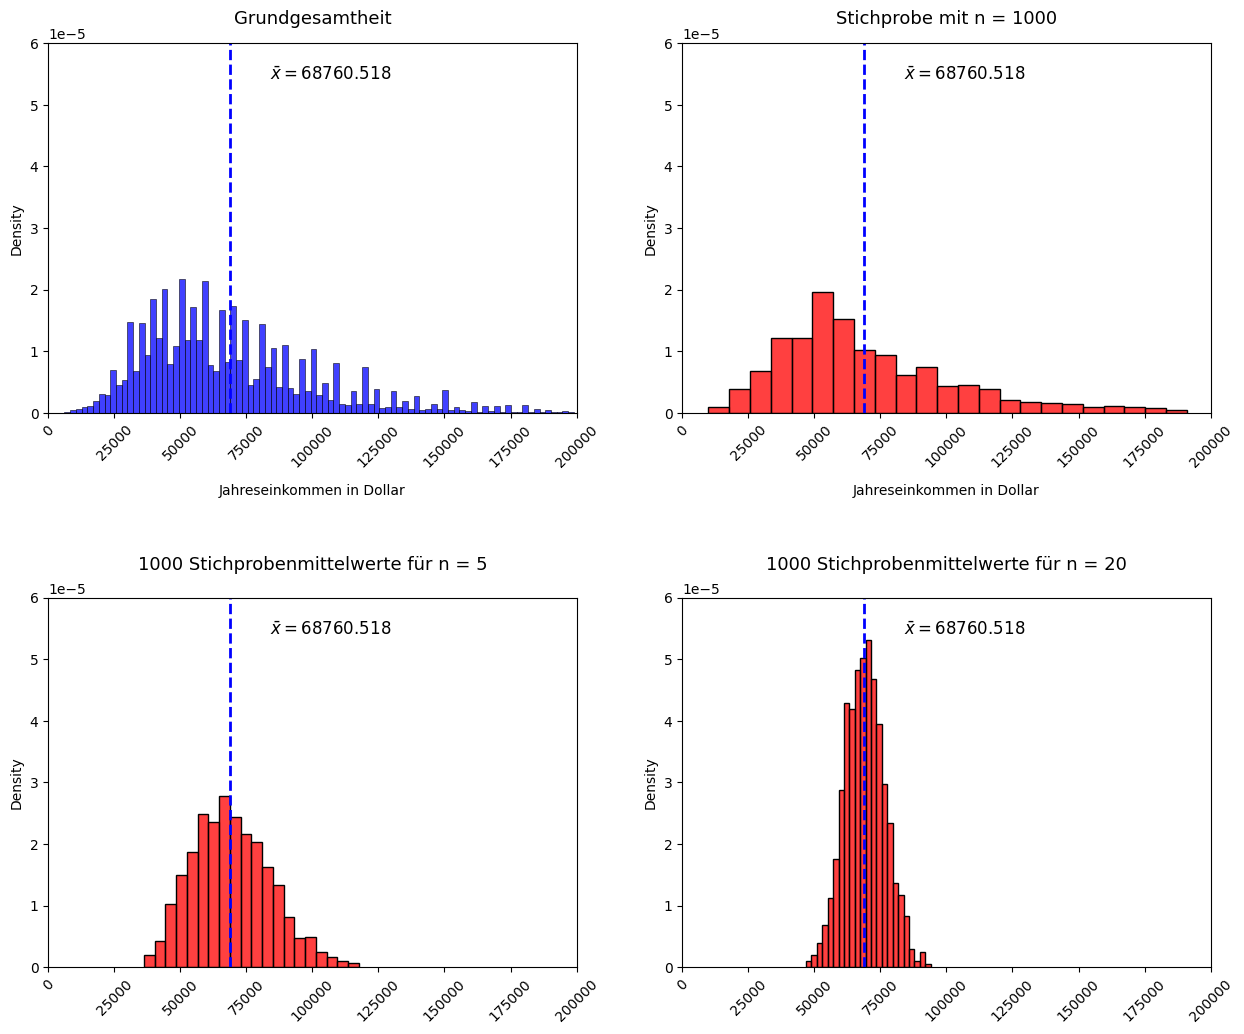

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,12))

ax1 = fig.add_subplot(2,2,1)
plt.xticks(rotation=45)
sns.histplot(income["x"],
             stat="density",
             color="blue",
             ax = ax1)
ax1.set_xlim(0,200000)
ax1.set_ylim(0,6*10**-5)
ax1.axvline(mittelwert_G,  # x Koordinate
            color="blue",lw=2,linestyle="dashed")
ax1.text(0.42,0.9,r"$\bar{x}=$"+"{m:.3f}".format(m=mittelwert_G),
         fontsize=12,transform=plt.gca().transAxes)
ax1.set_title("Grundgesamtheit",fontsize=13,pad=14)
ax1.set_xlabel("Jahreseinkommen in Dollar",labelpad=10)

ax2 = fig.add_subplot(2,2,2)
plt.xticks(rotation=45)
sns.histplot(stichprobe_A,
             stat="density",
             color="red",
             ax = ax2)
ax2.set_xlim(0,200000)
ax2.set_ylim(0,6*10**-5)
ax2.axvline(mittelwert_G,  # x Koordinate
            color="blue",lw=2,linestyle="dashed")
ax2.text(0.42,0.9,r"$\bar{x}=$"+"{m:.3f}".format(m=mittelwert_G),
         fontsize=12,transform=plt.gca().transAxes)
ax2.set_title("Stichprobe mit n = 1000",fontsize=13,pad=14)
ax2.set_xlabel("Jahreseinkommen in Dollar",labelpad=10)

# vertikaler Abstand zwischen Zeilen
plt.subplots_adjust(hspace=0.5)   
    
ax3 = fig.add_subplot(2,2,3)
plt.xticks(rotation=45)
sns.histplot(stichprobenmittelwerte_B,
             stat="density",
             color="red",
             ax=ax3)
ax3.set_xlim(0,200000)
ax3.set_ylim(0,6*10**-5)
ax3.axvline(mittelwert_G,  # x Koordinate
            color="blue",lw=2,linestyle="dashed")
ax3.text(0.42,0.9,r"$\bar{x}=$"+"{m:.3f}".format(m=mittelwert_G),
         fontsize=12,transform=plt.gca().transAxes)
ax3.set_title("1000 Stichprobenmittelwerte für n = 5",
              fontsize=13,pad=20)

ax4 = fig.add_subplot(2,2,4)
plt.xticks(rotation=45)
sns.histplot(stichprobenmittelwerte_C,
             stat="density",
             color="red",
             ax=ax4)
ax4.set_xlim(0,200000)
ax4.set_ylim(0,6*10**-5)
ax4.axvline(mittelwert_G,  # x Koordinate
            color="blue",lw=2,linestyle="dashed")
ax4.text(0.42,0.9,r"$\bar{x}=$"+"{m:.3f}".format(m=mittelwert_G),
         fontsize=12,transform=plt.gca().transAxes)
ax4.set_title("1000 Stichprobenmittelwerte für n = 20",
          fontsize=13,pad=20)

plt.show()

**Beobachtung:** 
- Unabhängig von der Stichprobengrösse $n$ verteilen sich die Stichprobenmittelwerte **um das wahre mittlere Jahreseinkommen** $\pmb{\bar{x}=68760.5}$. 
- Die Stichprobenmittelwerte **streuen weniger**, wenn wir Stichproben der Grösse $n=20$ zeiehen, als wenn wir Stichproben der Grösse $n=5$ zeihen.
- Die Verteilung der Stichprobenmittelwerte ist nicht rechtsschief, so wie die Verteilung der Grundgesamtheit. Für grössere Stichprobengrössen $n$ hat die Verteilung  der Stichprobenmittelwerte sogar eine Glockenform, also eine **Normalverteilung**. 

Versuchen wir nun eine möglichst passende **Normalverteilung** (also ein Modell) in die Dichtediagramme der Stichprobenmittelwerte zu zeichen.

Wir wählen die **zwei Parameter** <tt>loc</tt> und <tt>scale</tt> der Normalverteilung gemäss den Lage- und Streumassen der Stichprobenmittelwerte: 

In [94]:
from scipy.stats import norm

# zwei normalverteilte Zufallsvariablen
X_A = norm(loc=mittelwert_A,scale=std_A)
X_B = norm(loc=mittelwert_B,scale=std_B)
X_C = norm(loc=mittelwert_C,scale=std_C)

# Probability Density Function
x = np.linspace(0,200000.1,300)
X_A_pdf = X_A.pdf(x)
X_B_pdf = X_B.pdf(x)
X_C_pdf = X_C.pdf(x)

Nun ergänzen wir in den Abbildungen diese Normalverteilungen:

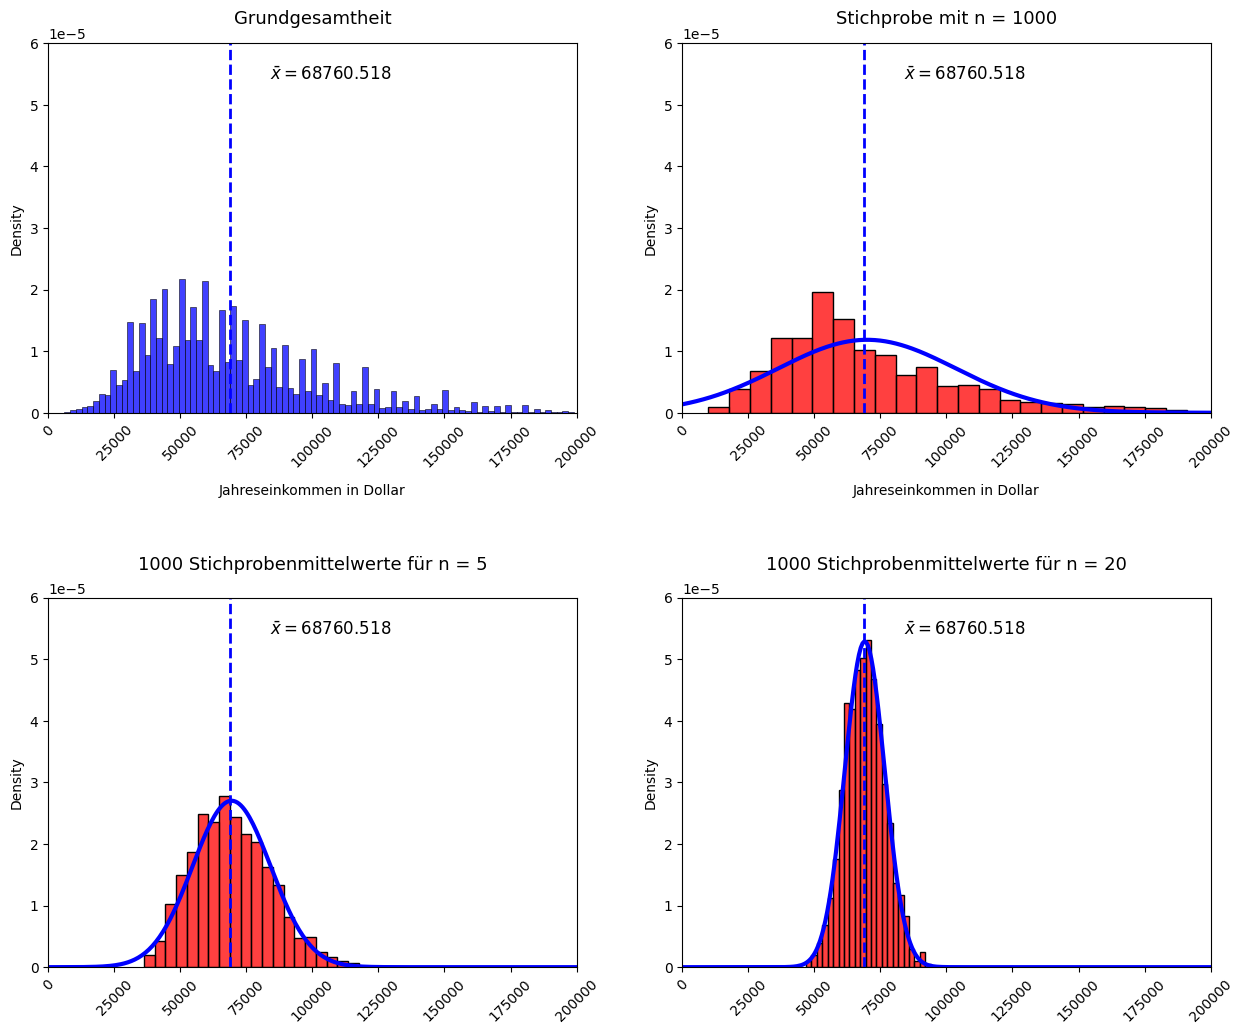

In [96]:
fig = plt.figure(figsize=(15,12))

ax1 = fig.add_subplot(2,2,1)
plt.xticks(rotation=45)
sns.histplot(income["x"],
             stat="density",
             color="blue",
             ax = ax1)
ax1.set_xlim(0,200000)
ax1.set_ylim(0,6*10**-5)
ax1.axvline(mittelwert_G,  # x Koordinate
            color="blue",lw=2,linestyle="dashed")
ax1.text(0.42,0.9,r"$\bar{x}=$"+"{m:.3f}".format(m=mittelwert_G),
         fontsize=12,transform=plt.gca().transAxes)
ax1.set_title("Grundgesamtheit",fontsize=13,pad=14)
ax1.set_xlabel("Jahreseinkommen in Dollar",labelpad=10)

ax2 = fig.add_subplot(2,2,2)
plt.xticks(rotation=45)
sns.histplot(stichprobe_A,
             stat="density",
             color="red",
             ax = ax2)
ax2.plot(x,X_A_pdf,lw=3,color="blue")
ax2.set_xlim(0,200000)
ax2.set_ylim(0,6*10**-5)
ax2.axvline(mittelwert_G,  # x Koordinate
            color="blue",lw=2,linestyle="dashed")
ax2.text(0.42,0.9,r"$\bar{x}=$"+"{m:.3f}".format(m=mittelwert_G),
         fontsize=12,transform=plt.gca().transAxes)
ax2.set_title("Stichprobe mit n = 1000",fontsize=13,pad=14)
ax2.set_xlabel("Jahreseinkommen in Dollar",labelpad=10)

# vertikaler Abstand zwischen Zeilen
plt.subplots_adjust(hspace=0.5)   
    
ax3 = fig.add_subplot(2,2,3)
plt.xticks(rotation=45)
sns.histplot(stichprobenmittelwerte_B,
             stat="density",
             color="red",
             ax=ax3)
ax3.plot(x,X_B_pdf,lw=3,color="blue")
ax3.set_xlim(0,200000)
ax3.set_ylim(0,6*10**-5)
ax3.axvline(mittelwert_G,  # x Koordinate
            color="blue",lw=2,linestyle="dashed")
ax3.text(0.42,0.9,r"$\bar{x}=$"+"{m:.3f}".format(m=mittelwert_G),
         fontsize=12,transform=plt.gca().transAxes)
ax3.set_title("1000 Stichprobenmittelwerte für n = 5",
              fontsize=13,pad=20)

ax4 = fig.add_subplot(2,2,4)
plt.xticks(rotation=45)
sns.histplot(stichprobenmittelwerte_C,
             stat="density",
             color="red",
             ax=ax4)
ax4.plot(x,X_C_pdf,lw=3,color="blue")
ax4.set_xlim(0,200000)
ax4.set_ylim(0,6*10**-5)
ax4.axvline(mittelwert_G,  # x Koordinate
            color="blue",lw=2,linestyle="dashed")
ax4.text(0.42,0.9,r"$\bar{x}=$"+"{m:.3f}".format(m=mittelwert_G),
         fontsize=12,transform=plt.gca().transAxes)
ax4.set_title("1000 Stichprobenmittelwerte für n = 20",
          fontsize=13,pad=20)

plt.show()

![HSLU](Bilder/LogoHSLU.png)